In [17]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as nf
import torchvision
import matplotlib.pyplot as plt
from time import time
from torch import optim
from torchvision import datasets, transforms


In [3]:
transform = transforms.ToTensor()

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) 
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:19<00:00, 516673.40it/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 4253360.04it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:02<00:00, 592120.78it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6352293.69it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



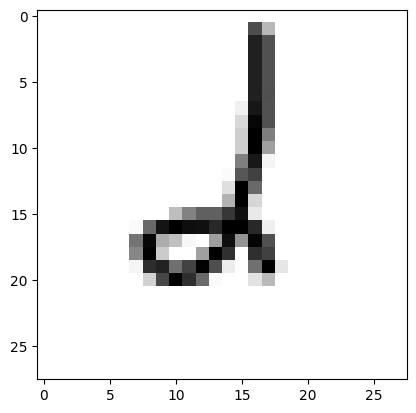

In [13]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap = 'gray_r')

In [21]:
#modelo inception V3, redes neurais

class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init()
        self.linear1 = nn.Linear(28*28, 128) #camada de entrada
        self.linear2 = nn.Linear(128, 64) # primeira camada interna 128 x 64
        self.linear3 = nn.Linear(64, 10)  # segunda camada interna 64 x 10 

    def forward(self,x):
        #Ativaçãod as camadas
        x = nf.relu(self.linear1(x))
        x = nf.relu(self.linear2(x))
        x = self.linear1(x)
        return nf.log_softmax(x, dim=1)

In [18]:
def treino(modelo, trainloader, device):
    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
    inicio = time()

    criterio = nn.NLLLoss()
    EPOCHS = 10
    modelo.train()

    for epoch in range(EPOCHS):
        perda_acumulada = 0

        for imagens, etiquetas in trainloader:

            imagens = imagens.view(imagens.shape[0], -1) # Converte imagens para vetores de 28*28 casas
            otimizador.zero_grad() #zwra os gradientes devido a linha acima

            output = modelo(imagens.to(device))
            perda_instantanea = criterio(output, etiquetas.to(device))

            perda_instantanea.backward()

            otimizador.step()

            perda_acumulada += perda_instantanea.item()

        else:
            print("Epoch {} - Perda resultande: {}".format(epoch+1, perda_acumulada/len(trainloader)))
            print("Tempo de Treino em minutos = ", (time() - inicio)/60)

    

In [23]:
def validacao(modelo, valloader, device):
    contas_corretas, conta_todas = 0
    for imagens, etiquetas in valloader:
        for i in range(len(etiquetas)):
            img = imagens[1].view(1, 784)
            #desativar o autogrid

            with torch.no_grad():
                logps = modelo(img.to(device))


            ps = torch.exp(logps)
            probab = list(ps.cpu().numpy()[0])
            etiqueta_pred = probab.index(max(probab))
            etiqueta_certa = etiquetas.numpy()[1]

            if(etiqueta_certa == etiqueta_pred):
                conta_corretas +=1
            conta_todas +=1

        print(f'Total de Imagens testadas = {conta_todas}')
        print(f'precisão do modelo = {contas_corretas*100/conta_todas}')

In [24]:
modelo = Modelo()

device = torch.device("cuda" if torch.cuda.is_avaliable() else "cpu")

modelo.to(device)


Modelo(
    (linear1).Linear(in_features=784, out_features=128, bias=True)
    (linear2).Linear(in_features=128, out_features=64, bias=True)
    (linear3).Linear(in_features=64, out_features=10, bias=True)
)

AttributeError: 'super' object has no attribute '_Modelo__init'